# Data Analysis from LVK Colaboration
## GWTC

#### Code Writed by Tadeo D.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sb
import csv
from scipy import constants
from tqdm import tqdm
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo
from astropy import constants as const
import astropy.units as u
from units import unit
from astropy.cosmology import Planck18, z_at_value
import pandas as pd
from matplotlib import cm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_linear_regression
from statistics import mode, multimode

,version,GPS,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
count,93.000000,9.300000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,93.000000,35.000000,...,91.000000,9.300000e+01,0.0,0.0,90.000000,0.0,0.0,89.000000,88.000000,88.000000
mean,1.225806,1.243403e+09,34.721538,-7.683516,12.378242,21.702198,-6.628022,6.818242,12.091067,-0.508571,...,0.181747,7.821881e+01,NaN,NaN,0.889074,NaN,NaN,55.111685,-7.913068,12.230227
std,0.573491,3.010448e+07,20.735926,6.711040,13.420128,14.573493,5.578161,5.872503,4.566804,0.258242,...,0.160238,7.153060e+02,NaN,NaN,0.219694,NaN,NaN,31.966282,7.142890,13.634497
min,1.000000,1.126259e+09,1.460000,-33.200000,0.120000,1.170000,-33.600000,0.070000,6.000000,-1.200000,...,0.000000,1.000000e-07,NaN,NaN,0.077572,NaN,NaN,2.800000,-34.300000,1.100000
25%,1.000000,1.241816e+09,20.250000,-9.400000,5.850000,8.250000,-9.000000,2.000000,9.030693,-0.600000,...,0.060000,1.000000e-05,NaN,NaN,0.940795,NaN,NaN,32.100000,-10.500000,4.300000
50%,1.000000,1.251009e+09,35.300000,-6.100000,9.500000,23.200000,-5.900000,5.400000,10.800000,-0.500000,...,0.120000,3.100000e-04,NaN,NaN,0.990000,NaN,NaN,56.400000,-6.200000,8.550000
75%,1.000000,1.260808e+09,42.200000,-3.000000,13.750000,28.950000,-2.450000,9.250000,13.072092,-0.400000,...,0.260000,4.600000e-01,NaN,NaN,1.000000,NaN,NaN,68.600000,-2.775000,16.000000
max,3.000000,1.268904e+09,106.900000,-0.100000,104.000000,76.600000,-0.060000,26.200000,33.000000,-0.200000,...,0.840000,6.900000e+03,NaN,NaN,1.000000,NaN,NaN,175.000000,-0.660000,100.000000


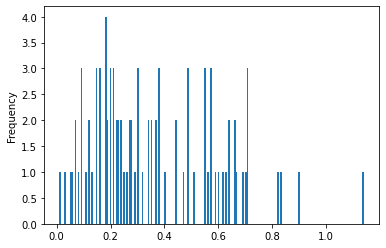

In [2]:
df = pd.read_csv('LIGO-3.csv')
df['redshift'].plot(kind='hist', bins=200);
df.describe()

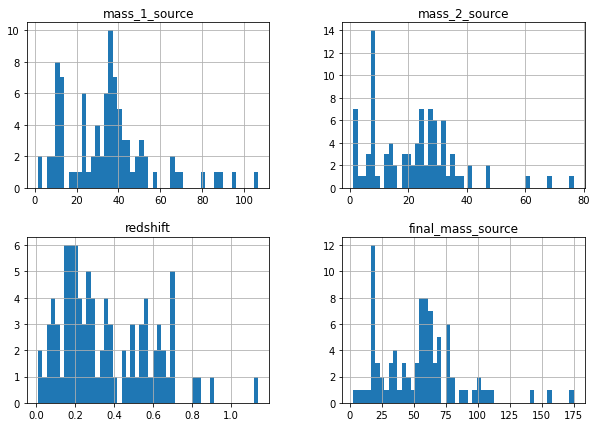

In [3]:
pl.rcParams['figure.figsize'] = (10, 7)
df.drop(['id','version','GPS','mass_1_source_lower', 'mass_1_source_upper',
         'mass_2_source_lower', 'mass_2_source_upper', 'network_matched_filter_snr',
         'network_matched_filter_snr_lower', 'chirp_mass', 'redshift_lower', 'redshift_upper',
         'far','far_lower','far_upper','final_mass_source_lower','final_mass_source_upper',
         'chirp_mass_upper','chirp_mass_lower','reference','jsonurl','catalog.shortName','chirp_mass_source',
         'chirp_mass_source_lower','chirp_mass_source_upper','network_matched_filter_snr_upper','luminosity_distance','luminosity_distance_lower',
         'luminosity_distance_upper','chi_eff','chi_eff_lower','chi_eff_upper','total_mass_source','total_mass_source_lower','total_mass_source_upper','p_astro','p_astro_lower','p_astro_upper'],1).hist(bins= 50)
#pl.savefig('input_characteristics.png', dpi=300, bbox_inches='tight')
pl.show()

In [10]:
data_row=[]
with open('LIGO-3.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',', quotechar=':')
    for row in reader:
            string=[row['id'], row['mass_1_source'],
                    row['mass_2_source'], row['redshift']] #If I need to get a new row only write its name
            data_row.append(string)
m_min = []
m_max = []
delete = []
details = []
pr_z=[]
for i in range(len(data_row)):
    event = data_row[i]
    name = event[0]
    if event[1]==str(''):
        event[1]=0
    if event[2]==str(''):
        event[2]=0
    if event[3]==str(''):
        event[3]=0
    mass1 = float(event[1])
    mass2 = float(event[2])
    redshift = float(event[3])
    if  mass1 == 0 and mass2 == 0 and redshift == 0:
        delete.append(name)
        details.append(event)
        continue
    if mass1 > mass2: #Conditional sentece to choose the mass mini and mass max
        m_min.append(mass2)
        m_max.append(mass1)
    elif mass2 > mass1:
        m_min.append(mass1)
        m_max.append(mass2)
    pr_z.append(redshift)
    #print(i+1, "\t LIGO Event:", event)
    #print("\n")
print("Invalid Events:", delete)
for i in details:
    print(i)

1 	 LIGO Event: ['GW150914-v3', '35.6', '30.6', '0.09']


2 	 LIGO Event: ['GW151012-v3', '23.2', '13.6', '0.21']


3 	 LIGO Event: ['GW151226-v2', '13.7', '7.7', '0.09']


4 	 LIGO Event: ['GW170104-v2', '30.8', '20.0', '0.2']


5 	 LIGO Event: ['GW170608-v3', '11.0', '7.6', '0.07']


6 	 LIGO Event: ['GW170729-v1', '50.2', '34.0', '0.49']


7 	 LIGO Event: ['GW170809-v1', '35.0', '23.8', '0.2']


8 	 LIGO Event: ['GW170814-v3', '30.6', '25.2', '0.12']


9 	 LIGO Event: ['GW170817-v3', '1.46', '1.27', '0.01']


10 	 LIGO Event: ['GW170818-v1', '35.4', '26.7', '0.21']


11 	 LIGO Event: ['GW170823-v1', '39.5', '29.0', '0.35']


12 	 LIGO Event: ['GW190403_051519-v1', '88.0', '22.1', '1.14']


13 	 LIGO Event: ['GW190408_181802-v1', '24.6', '18.4', '0.29']


14 	 LIGO Event: ['GW190412-v3', '30.1', '8.3', '0.15']


15 	 LIGO Event: ['GW190413_052954-v1', '34.7', '23.7', '0.59']


16 	 LIGO Event: ['GW190413_134308-v1', '47.5', '31.8', '0.71']


17 	 LIGO Event: ['GW190421_213856-v1', '4

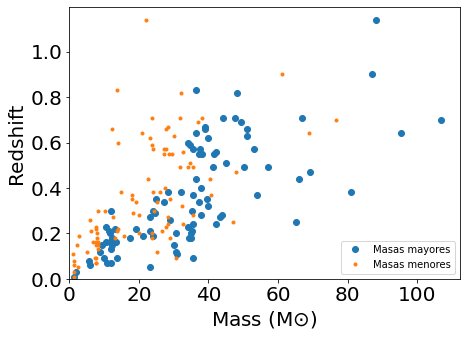

In [12]:
pl.plot(m_max, pr_z,'o')
pl.plot(m_min, pr_z,'.')
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(ymin=0.)
pl.xlim(xmin=0.)
pl.xlabel("Mass (M$\odot$)", fontsize=20)
pl.ylabel("Redshift", fontsize=20)
pl.legend(('Masas mayores', 'Masas menores'), loc='lower right')
#pl.savefig('Z_vs_Masses.png', dpi=300, bbox_inches='tight')
pl.show()

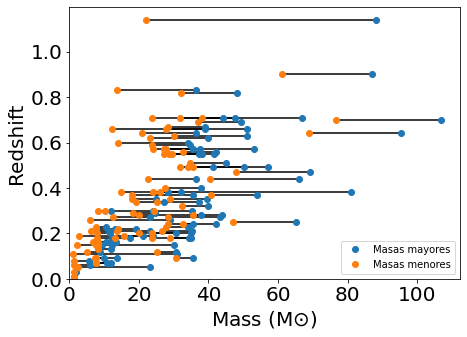

In [13]:
pl.plot(m_max, pr_z,'o')
pl.plot(m_min, pr_z,'o')
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(ymin=0.)
pl.xlim(xmin=0.)

pl.xlabel("Mass (M$\odot$)", fontsize=20)
pl.ylabel("Redshift", fontsize=20)

pl.legend(('Masas mayores', 'Masas menores'), loc='lower right')

#pl.legend(('Higher Mass', 'Lower Mass'), loc='lower right')
#print(m_min[0]/const.M_sun*u.kg)

for i in range(len(pr_z)):
    pl.hlines(y=pr_z[i], xmin=m_min[i], xmax=m_max[i], color='black')

#pl.savefig('pair_z_vs_Masses.png', dpi=300, bbox_inches='tight')
pl.show()